#### Imports

In [11]:
# Importing Required Libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import yfinance as yf  
from statsmodels.tsa.ar_model import AutoReg  
from statsmodels.tsa.arima.model import ARIMA  
from statsmodels.tsa.stattools import adfuller  
import statsmodels.api as sm  


In [12]:
# Set display options for better readability  
pd.set_option('display.max_columns', None)  
pd.set_option('display.float_format', '{:.2f}'.format)  

#### Data Collection
This section fetches historical stock data for selected companies from Yahoo Finance. It ensures the selection of diversified stocks across industries to mitigate risks. Data from 2015–2023 is used to balance historical trends with recent performance.

[*********************100%***********************]  5 of 5 completed


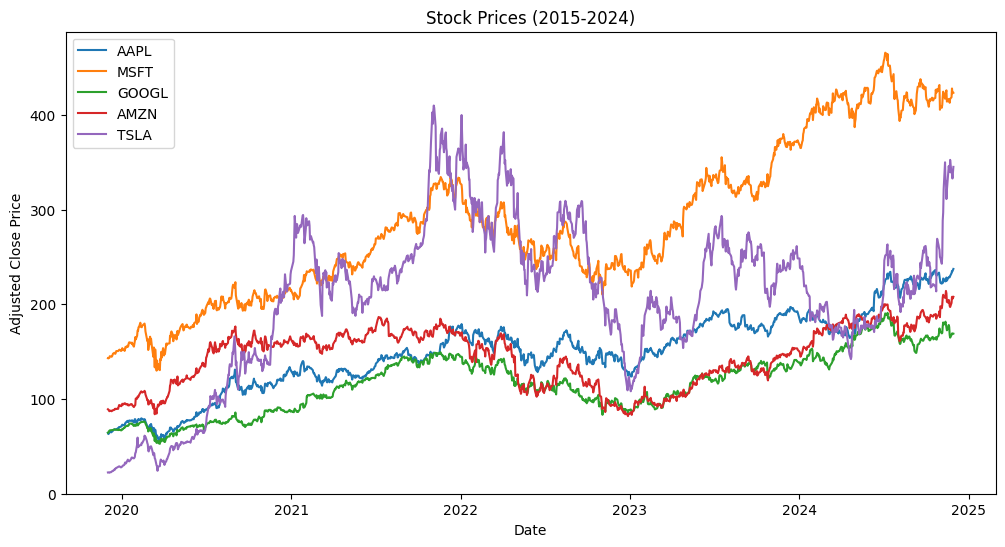

In [14]:
# List of stocks to include in the portfolio  
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']  # Apple, Microsoft, Google, Amazon, Tesla  

# Downloading stock price data for the last 5 years  
price_data = yf.download(stocks, start='2019-12-01', end='2024-12-01')['Adj Close']  

# Display the first few rows of the downloaded data  
price_data.head()  


# Visualizing stock price data
plt.figure(figsize=(12, 6))
for stock in stocks:
    plt.plot(price_data[stock], label=stock)
plt.title("Stock Prices (2015-2024)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()


In [15]:
price_data.head()  

Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2019-12-02,64.02,89.08,64.28,143.04,22.32
2019-12-03,62.88,88.50,64.58,142.81,22.41
2019-12-04,63.44,88.03,65.78,143.33,22.20
2019-12-05,64.37,87.02,66.18,143.41,22.02
2019-12-06,65.61,87.58,66.80,145.15,22.39


#### Step 2: Create Return Data

In [16]:
# Calculate daily returns  
returns_data = price_data.pct_change().dropna()  

# Display the first few rows of returns data  
returns_data.head()  


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2019-12-03,-0.02,-0.01,0.00,-0.00,0.00
2019-12-04,0.01,-0.01,0.02,0.00,-0.01
2019-12-05,0.01,-0.01,0.01,0.00,-0.01
2019-12-06,0.02,0.01,0.01,0.01,0.02
2019-12-09,-0.01,-0.00,0.00,-0.00,0.01


#### Step 3: Autoregressive Model (AR)

In [17]:
# Choose a stock for prediction (e.g., Apple)  
stock_to_predict = 'AAPL'  
stock_returns = returns_data[stock_to_predict]  

# Fit an Autoregressive model  
model_ar = AutoReg(stock_returns, lags=5).fit()  # Using 5 lags  
print("Autoregressive Model Summary:")  
print(model_ar.summary())  

# Make predictions  
predictions_ar = model_ar.predict(start=len(stock_returns), end=len(stock_returns) + 4, dynamic=False)  
print("AR Predictions:", predictions_ar)  

Autoregressive Model Summary:
                            AutoReg Model Results                             
Dep. Variable:                   AAPL   No. Observations:                 1257
Model:                     AutoReg(5)   Log Likelihood                3132.215
Method:               Conditional MLE   S.D. of innovations              0.020
Date:                Tue, 03 Dec 2024   AIC                          -6250.430
Time:                        21:57:52   BIC                          -6214.503
Sample:                             5   HQIC                         -6236.925
                                 1257                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.413      0.016       0.000       0.002
AAPL.L1       -0.1123      0.028     -3.978      0.000      -0.168      -0.057
AAPL.L2        0.0042 

/Users/sakshiii/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sakshiii/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sakshiii/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/sakshiii/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Ind

#### Step 4: ARIMA Model

In [18]:
# Check stationarity of the stock prices using the Augmented Dickey-Fuller test  
adf_result = adfuller(price_data[stock_to_predict])  
print(f'ADF Statistic: {adf_result[0]}')  
print(f'p-value: {adf_result[1]}')  

# Differencing the series if it is not stationary  
if adf_result[1] > 0.05:  
    price_diff = price_data[stock_to_predict].diff().dropna()  
else:  
    price_diff = price_data[stock_to_predict]  

# Fit an ARIMA model  
model_arima = ARIMA(price_data[stock_to_predict], order=(1, 1, 1)).fit()  # ARIMA(1,1,1)  
print("ARIMA Model Summary:")  
print(model_arima.summary())  

# Forecast next 5 periods  
predictions_arima = model_arima.forecast(steps=5)  
print("ARIMA Predictions:", predictions_arima)  

ADF Statistic: -1.0681208047127912
p-value: 0.7276161330315954
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1258
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3007.604
Date:                Tue, 03 Dec 2024   AIC                           6021.207
Time:                        21:58:33   BIC                           6036.617
Sample:                             0   HQIC                          6026.999
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5688      0.592      0.961      0.337      -0.591       1.729
ma.L1         -0.5913      0.583     -1.013    

/Users/sakshiii/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sakshiii/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sakshiii/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sakshiii/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as st

#### Step 5: Moving Average Method

In [20]:
# Calculate moving averages  
window_size = 5  # 5-day moving average  
moving_average = price_data[stock_to_predict].rolling(window=window_size).mean()  

# Display the last few values of the moving average  
print("5-Day Moving Average Values:")  
print(moving_average.tail())  

5-Day Moving Average Values:
Date
2024-11-22   228.74
2024-11-25   229.71
2024-11-26   231.06
2024-11-27   232.25
2024-11-29   234.01
Name: AAPL, dtype: float64


#### Step 6: Portfolio Performance Evaluation

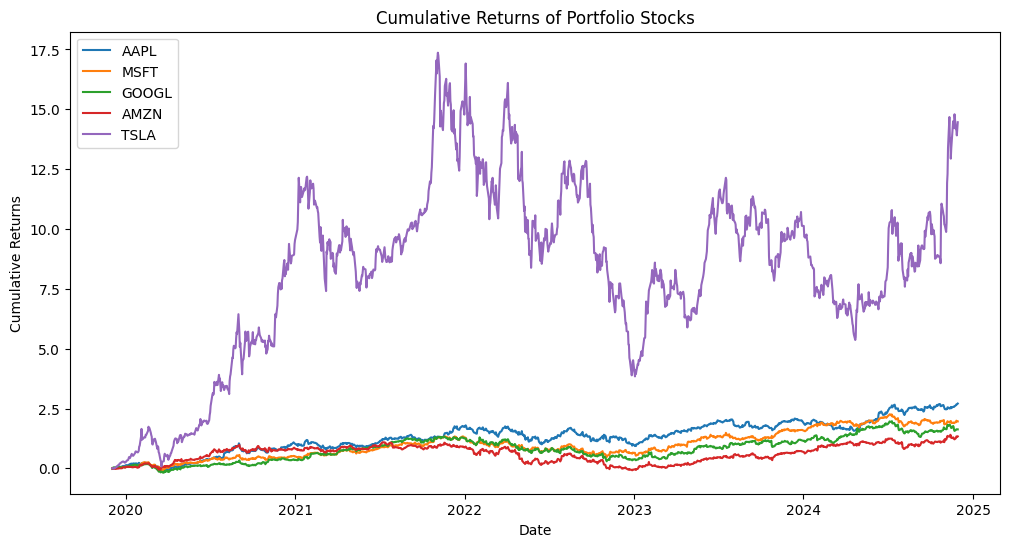

Optimal Portfolio Weights:
AAPL: 0.44
MSFT: 0.00
GOOGL: 0.03
AMZN: 0.10
TSLA: 0.43
Expected Portfolio Return: 0.00
Expected Portfolio Standard Deviation: 0.03


In [21]:
# Calculate the cumulative returns of each stock  
cumulative_returns = (1 + returns_data).cumprod() - 1  

# Plot cumulative returns of the stocks  
plt.figure(figsize=(12, 6))  
for stock in stocks:  
    plt.plot(cumulative_returns[stock], label=stock)  
    
plt.title('Cumulative Returns of Portfolio Stocks')  
plt.xlabel('Date')  
plt.ylabel('Cumulative Returns')  
plt.legend()  
plt.show()  

# Calculate average returns and covariance matrix  
mean_returns = returns_data.mean()  
cov_matrix = returns_data.cov()  

# Perform Monte Carlo simulations to find the optimal weights  
num_simulations = 10000  
results = np.zeros((3, num_simulations))  
weights_record = []  

for i in range(num_simulations):  
    weights = np.random.random(len(stocks))  
    weights /= np.sum(weights)  # Normalize to sum to 1  
    weights_record.append(weights)  
    
    portfolio_return = np.sum(weights * mean_returns)  
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  
    
    # Store the results  
    results[0,i] = portfolio_return  
    results[1,i] = portfolio_std_dev  
    results[2,i] = results[0,i] / results[1,i]  # Sharpe ratio  

# Convert results to a DataFrame  
results_df = pd.DataFrame(results.T, columns=['Return', 'Standard Deviation', 'Sharpe Ratio'])  

# Locate the optimal portfolio (highest Sharpe Ratio)  
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()  
optimal_weights = weights_record[max_sharpe_idx]  

# Display the optimal weights and return  
print("Optimal Portfolio Weights:")  
for stock, weight in zip(stocks, optimal_weights):  
    print(f"{stock}: {weight:.2f}")  

print(f"Expected Portfolio Return: {results_df['Return'].iloc[max_sharpe_idx]:.2f}")  
print(f"Expected Portfolio Standard Deviation: {results_df['Standard Deviation'].iloc[max_sharpe_idx]:.2f}")  